<a href="https://colab.research.google.com/github/oyhr100/LAB-5-raterx/blob/main/Lab5_0406_1615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Settings**

In [6]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# Shuts off Jedi to speed up tab completions
# the command %config Completer.use_jedi = False is used in IPython or Jupyter environments to disable the use of the Jedi library for autocompletion, which can sometimes lead to faster completion suggestions.
%config Completer.use_jedi = False

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import multiprocessing
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as ss
import seaborn as sns

## Import various ML classes from Scikit-learn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit, train_test_split

import string
from time import time

In [8]:
#mport ast refers to importing the ast module, which is a part of Python's standard library. The ast module provides facilities for processing, analyzing, and modifying Abstract Syntax Trees (ASTs).
import ast
import datetime
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import seaborn as sns
import scipy.stats as ss
#The primary use of the tqdm function is to wrap around any iterable, like a list or a loop, to display a smart progress meter.
#For example, if you have a for loop that iterates over a large dataset, you can wrap tqdm around the iterable, and it will display a progress bar that updates with each iteration.
from tqdm import tqdm

!pip install itables
# To display dataframes as interactive tables in the notebook:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import os

In [9]:
import ast
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
import scipy.stats as ss

In [10]:
import os
# https://drive.google.com/file/d/19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2/view?usp=sharing


if not os.path.exists("20-raterx-data.pq"):
    !gdown --id 19LbtW4l9fNhGZ-6NxINfD7NjEuSK6YH2

In [12]:
plt.rcParams.update({'font.size': 16})
DFILE = '20-raterx-data.pq'
SEED = 24
TOL = 1.0e-8

# **Problem 2**
Perform feature engineering on the data to construct a set of predictors for your model.

In [227]:
df = pd.read_parquet(DFILE)

# Function to apply log transformation with custom handling for negative values
def log_transform(x):
    if x > 0:
        return np.log(x)
    else:
        return -1

vlist = [ 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp']

for i in vlist:
  df['l_'+i] = df[i].apply(lambda x: np.log(x) if x > 0 else -1)

df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_sale    l_cogs    l_xsga  \
0      275.576   63.441   388.521  33.821  ...  6.097793  5.819878  3.987353   
1      268.399   63.415   379.958  16.500  ...  6.145348  5.902743  4.069796   
2      289.537   60.422   395.351  25.005  ...  6.046561  5.802288  4.041471   
3      265.036   56.052   365.151  25.025  ...  5.947460  5.728267  3.953031   
4      307.723   54.783   417.626   0.568  ...  6.010664  5.794726  3.913742   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  4.987708  5.131058  2.922409   
26925   32.805  334.328   372.587   1.579  ...  4.172432  3.548381  2.661727   
26926   51.829  232.721   297.386   1.395  ...  4.161832  4.097257  2.412067   
26927  297.000  434.000  1847.000   6.000  ...  7.017506  6.713199  4.852030   
26928  311.000  470.000  1856.000   7.000  ...  7.090077  6.769872  4.369448   

        l_xrent   l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  
0      1.446919  3.989576  3.846972  2.301484 -1.000000  3.244738 -1.000000  
1      1.460938  3.736645  3.517528  2.309859 -1.000000  2.694695 -1.000000  
2      1.578979  3.546480  3.278276  2.122980 -1.000000  2.304583 -1.000000  
3      1.671473  3.146348  2.793800  2.092728 -1.000000 -1.262308 -1.000000  
4      1.576915  3.370944  3.083010  2.258006 -1.000000  2.249606 -1.000000  
...         ...       ...       ...       ...       ...       ...       ...  
26924 -0.105361 -1.000000 -1.000000  3.555976 -1.000000 -1.000000  4.611122  
26925 -0.223144  2.759693 -1.000000  3.560847 -1.000000 -1.000000  3.603539  
26926 -0.223144 -1.000000 -1.000000  3.622312 -1.000000 -1.000000  3.274083  
26927  2.809403  5.104733  4.204693  4.359270 -1.609438 -1.000000 -1.000000  
26928  2.839078  5.520661  4.905275  4.436752 -0.693147 -1.000000 -1.000000  

[26929 rows x 49 columns]

 a. What variables do you think will be informative about a firms’ credit ratings? Justify your choices.


In [228]:
# Mapping from credit ratings to numbers
credit_rating_to_number = {
    'AAA': 1,
    'AA+': 2,
    'AA': 2,
    'AA-': 2,
    'A+': 3,
    'A': 3,
    'A-': 3,
    'BBB+': 4,
    'BBB': 4,
    'BBB-': 4,
    'BB+': 5,
    'BB': 5,
    'BB-': 5,
    'B+': 6,
    'B': 6,
    'B-': 6,
    'CCC+': 7,
    'CCC': 7,
    'CCC-': 7,
    'CC': 8,
    'C': 9,
    'D': 9,
}

df['credit_rating_number'] = df['credit_rating'].map(credit_rating_to_number)
df = df.dropna()
df

gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_cogs    l_xsga   l_xrent  \
0      275.576   63.441   388.521  33.821  ...  5.819878  3.987353  1.446919   
1      268.399   63.415   379.958  16.500  ...  5.902743  4.069796  1.460938   
2      289.537   60.422   395.351  25.005  ...  5.802288  4.041471  1.578979   
3      265.036   56.052   365.151  25.025  ...  5.728267  3.953031  1.671473   
4      307.723   54.783   417.626   0.568  ...  5.794726  3.913742  1.576915   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  5.131058  2.922409 -0.105361   
26925   32.805  334.328   372.587   1.579  ...  3.548381  2.661727 -0.223144   
26926   51.829  232.721   297.386   1.395  ...  4.097257  2.412067 -0.223144   
26927  297.000  434.000  1847.000   6.000  ...  6.713199  4.852030  2.809403   
26928  311.000  470.000  1856.000   7.000  ...  6.769872  4.369448  2.839078   

        l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  \
0      3.989576  3.846972  2.301484 -1.000000  3.244738 -1.000000   
1      3.736645  3.517528  2.309859 -1.000000  2.694695 -1.000000   
2      3.546480  3.278276  2.122980 -1.000000  2.304583 -1.000000   
3      3.146348  2.793800  2.092728 -1.000000 -1.262308 -1.000000   
4      3.370944  3.083010  2.258006 -1.000000  2.249606 -1.000000   
...         ...       ...       ...       ...       ...       ...   
26924 -1.000000 -1.000000  3.555976 -1.000000 -1.000000  4.611122   
26925  2.759693 -1.000000  3.560847 -1.000000 -1.000000  3.603539   
26926 -1.000000 -1.000000  3.622312 -1.000000 -1.000000  3.274083   
26927  5.104733  4.204693  4.359270 -1.609438 -1.000000 -1.000000   
26928  5.520661  4.905275  4.436752 -0.693147 -1.000000 -1.000000   

       credit_rating_number  
0                         4  
1                         4  
2                         4  
3                         4  
4                         4  
...                     ...  
26924                     6  
26925                     7  
26926                     7  
26927                     6  
26928                     6  

[15986 rows x 50 columns]

In [229]:
'''df['current_ratio'] = df['act'] / df['lct']
df['interest_coverage'] = df['oibdp'] / df['xint']
df['return_on_assets'] = df['ib'] / df['at']
df['return_on_equity'] = df['ib'] / df['seq']
df['asset_turnover'] = df['sale'] / df['at']

df['gross_profit_margin'] = (df['sale'] - df['cogs']) / df['sale']
df['operating_margin'] = df['oibdp'] / df['sale']
df['net_profit_margin'] = df['ib'] / df['sale']
df['return_on_investment'] = df['ib'] / df['at']
df['debt_ratio'] = df['lt'] / df['at']
df['times_interest_earned'] = df['oibdp'] / df['xint']'''

"df['current_ratio'] = df['act'] / df['lct']\ndf['interest_coverage'] = df['oibdp'] / df['xint']\ndf['return_on_assets'] = df['ib'] / df['at']\ndf['return_on_equity'] = df['ib'] / df['seq']\ndf['asset_turnover'] = df['sale'] / df['at']\n\ndf['gross_profit_margin'] = (df['sale'] - df['cogs']) / df['sale']\ndf['operating_margin'] = df['oibdp'] / df['sale']\ndf['net_profit_margin'] = df['ib'] / df['sale']\ndf['return_on_investment'] = df['ib'] / df['at']\ndf['debt_ratio'] = df['lt'] / df['at']\ndf['times_interest_earned'] = df['oibdp'] / df['xint']"

In [230]:
df_new = df

In [231]:
# 将无穷大值替换为NaN
df_new.replace([np.inf, -np.inf], np.nan, inplace=True)

# 移除含有NaN的行
df_new.dropna(inplace=True)
df_new

<ipython-input-231-39c64934e699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-231-39c64934e699>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace=True)


gvkey   datadate             conm    sich credit_rating     che  \
0        1004 1990-05-31         AAR CORP  5080.0           BBB   4.044   
1        1004 1991-05-31         AAR CORP  5080.0           BBB   1.553   
2        1004 1992-05-31         AAR CORP  5080.0           BBB   4.197   
3        1004 1993-05-31         AAR CORP  5080.0           BBB   2.255   
4        1004 1994-05-31         AAR CORP  5080.0           BBB  18.074   
...       ...        ...              ...     ...           ...     ...   
26924  266163 2008-12-31  DUNE ENERGY INC  1311.0            B-  15.492   
26925  266163 2009-12-31  DUNE ENERGY INC  1311.0          CCC-  15.053   
26926  266163 2010-12-31  DUNE ENERGY INC  1311.0          CCC-  39.423   
26927  311524 2012-12-31     TAMINCO CORP  2860.0            B+  67.000   
26928  311524 2013-12-31     TAMINCO CORP  2860.0            B+  88.000   

           act    ppent        at     dlc  ...    l_cogs    l_xsga   l_xrent  \
0      275.576   63.441   388.521  33.821  ...  5.819878  3.987353  1.446919   
1      268.399   63.415   379.958  16.500  ...  5.902743  4.069796  1.460938   
2      289.537   60.422   395.351  25.005  ...  5.802288  4.041471  1.578979   
3      265.036   56.052   365.151  25.025  ...  5.728267  3.953031  1.671473   
4      307.723   54.783   417.626   0.568  ...  5.794726  3.913742  1.576915   
...        ...      ...       ...     ...  ...       ...       ...       ...   
26924   40.895  357.284   402.052   2.014  ...  5.131058  2.922409 -0.105361   
26925   32.805  334.328   372.587   1.579  ...  3.548381  2.661727 -0.223144   
26926   51.829  232.721   297.386   1.395  ...  4.097257  2.412067 -0.223144   
26927  297.000  434.000  1847.000   6.000  ...  6.713199  4.852030  2.809403   
26928  311.000  470.000  1856.000   7.000  ...  6.769872  4.369448  2.839078   

        l_oibdp   l_oiadp    l_xint    l_intc      l_ib     l_dvp  \
0      3.989576  3.846972  2.301484 -1.000000  3.244738 -1.000000   
1      3.736645  3.517528  2.309859 -1.000000  2.694695 -1.000000   
2      3.546480  3.278276  2.122980 -1.000000  2.304583 -1.000000   
3      3.146348  2.793800  2.092728 -1.000000 -1.262308 -1.000000   
4      3.370944  3.083010  2.258006 -1.000000  2.249606 -1.000000   
...         ...       ...       ...       ...       ...       ...   
26924 -1.000000 -1.000000  3.555976 -1.000000 -1.000000  4.611122   
26925  2.759693 -1.000000  3.560847 -1.000000 -1.000000  3.603539   
26926 -1.000000 -1.000000  3.622312 -1.000000 -1.000000  3.274083   
26927  5.104733  4.204693  4.359270 -1.609438 -1.000000 -1.000000   
26928  5.520661  4.905275  4.436752 -0.693147 -1.000000 -1.000000   

       credit_rating_number  
0                         4  
1                         4  
2                         4  
3                         4  
4                         4  
...                     ...  
26924                     6  
26925                     7  
26926                     7  
26927                     6  
26928                     6  

[15986 rows x 50 columns]

In [232]:
df_new.columns

Index(['gvkey', 'datadate', 'conm', 'sich', 'credit_rating', 'che', 'act',
       'ppent', 'at', 'dlc', 'lct', 'dltt', 'lt', 'txdb', 're', 'seq', 'mib',
       'sale', 'cogs', 'xsga', 'xrent', 'oibdp', 'oiadp', 'xint', 'intc', 'ib',
       'dvp', 'l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'credit_rating_number'],
      dtype='object')

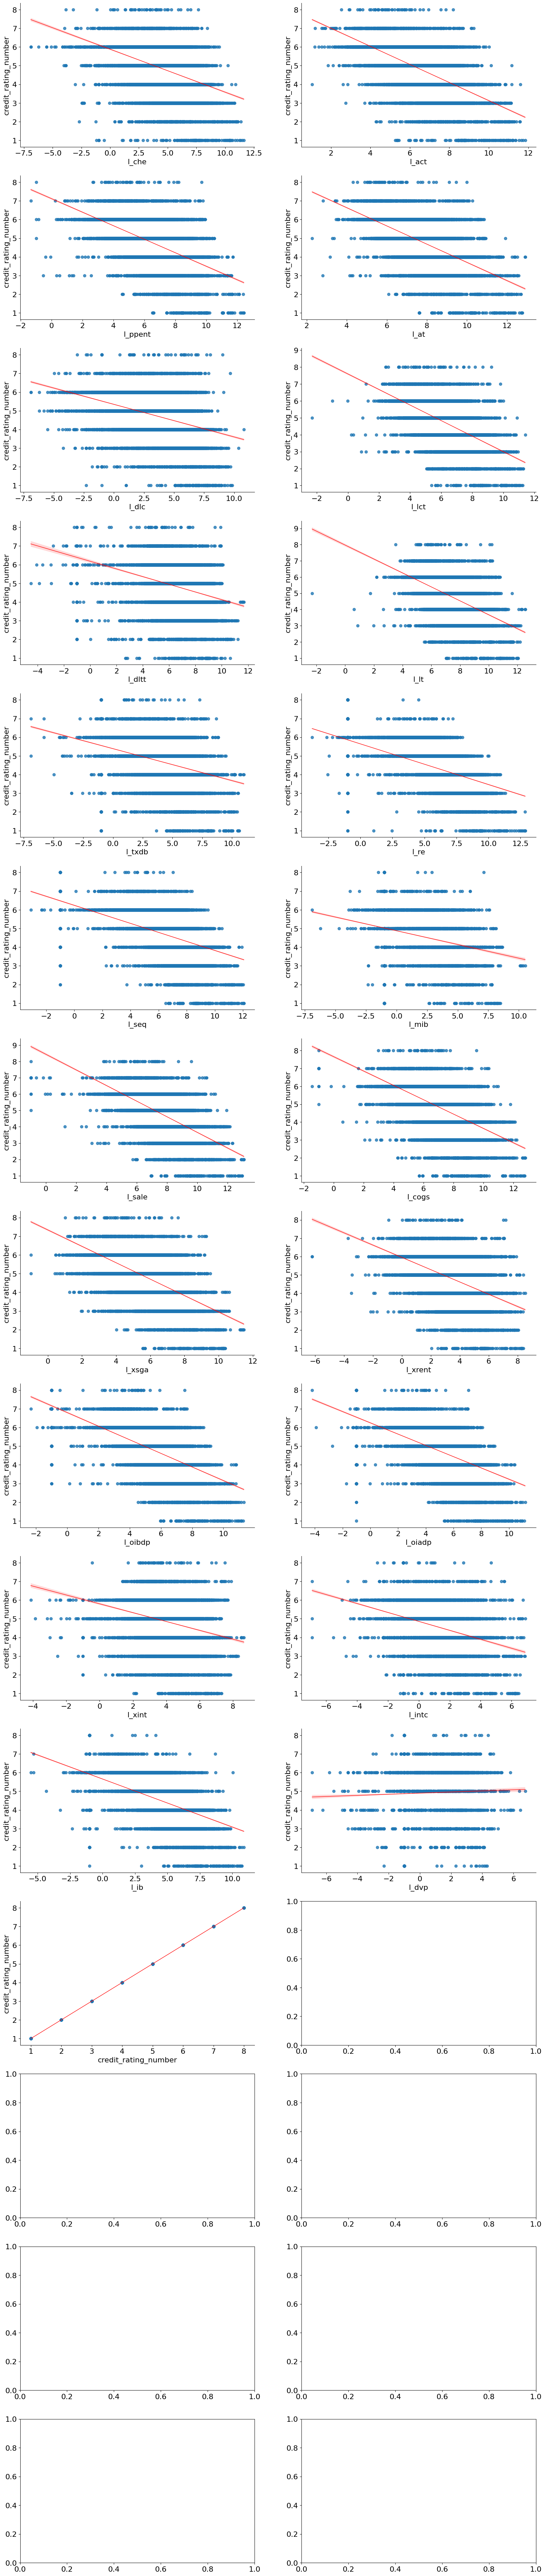

In [234]:
vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp','credit_rating_number']
fig,axes=plt.subplots(15,2,figsize=(20,100))
axes=np.ravel(axes)
for v,ax in zip(vlist,axes):
    sns.regplot(y=df_new['credit_rating_number'],x=df[v],line_kws={'color':'r','linewidth':1},ax=ax)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# **Problem 4**

In [235]:
'''from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp', 'current_ratio', 'interest_coverage',
       'return_on_assets', 'return_on_equity', 'asset_turnover',
       'gross_profit_margin', 'operating_margin', 'net_profit_margin',
       'return_on_investment', 'debt_ratio', 'times_interest_earned', 'credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)'''

"from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\nvlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',\n       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',\n       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',\n       'l_dvp', 'current_ratio', 'interest_coverage',\n       'return_on_assets', 'return_on_equity', 'asset_turnover',\n       'gross_profit_margin', 'operating_margin', 'net_profit_margin',\n       'return_on_investment', 'debt_ratio', 'times_interest_earned', 'credit_rating_number']\n\ndf_end = df_new[vlist]\n\ntrain_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)\n\ny_tr = train_df['credit_rating_number']\nX_tr = train_df.iloc[:,0:-1]\n\ny_test = test_df['credit_rating_number']\nX_test = test_df.iloc[:,0:-1]\n\nscaler = StandardScaler()\nX_tr = scaler.fit_transform(X_tr)\nX_test = scaler.transform(X_test)"

In [236]:
'''from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)'''

'from sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score\n\nmodel = LogisticRegression(multi_class=\'multinomial\', solver=\'lbfgs\', max_iter=1000)\nmodel.fit(X_tr, y_tr)\n\n\n# 打印模型的所有参数\nparams = model.get_params()\nfor param_name, param_value in params.items():\n    print(param_name, ":", param_value)\n\n# 在测试集上进行预测\ny_pred = model.predict(X_test)\n\n# 计算模型准确率\naccuracy = accuracy_score(y_test, y_pred)\nprint("准确率：", accuracy)'

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

vlist = ['l_che', 'l_act', 'l_ppent', 'l_at', 'l_dlc', 'l_lct', 'l_dltt',
       'l_lt', 'l_txdb', 'l_re', 'l_seq', 'l_mib', 'l_sale', 'l_cogs',
       'l_xsga', 'l_xrent', 'l_oibdp', 'l_oiadp', 'l_xint', 'l_intc', 'l_ib',
       'l_dvp','credit_rating_number']

df_end = df_new[vlist]

train_df, test_df = train_test_split(df_end, test_size=0.25, random_state=42)

y_tr = train_df['credit_rating_number']
X_tr = train_df.iloc[:,0:-1]

y_test = test_df['credit_rating_number']
X_test = test_df.iloc[:,0:-1]

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_tr, y_tr)


# 打印模型的所有参数
params = model.get_params()
for param_name, param_value in params.items():
    print(param_name, ":", param_value)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

C : 1.0
class_weight : None
dual : False
fit_intercept : True
intercept_scaling : 1
l1_ratio : None
max_iter : 1000
multi_class : multinomial
n_jobs : None
penalty : l2
random_state : None
solver : lbfgs
tol : 0.0001
verbose : 0
warm_start : False
准确率： 0.5809357017763322
